In [1]:
import numpy as np
import matplotlib.pyplot as plt
import audacity
import TransferFunctions as tf
import SoundUtils as sut
import scipy.signal as sig
import peakutils

%matplotlib notebook

In [209]:
rpmvals = ['4250', '4500', '4750']
acquisitions = ['open', 'closed']
sensitivity = 0.000316
runs = 3

dfiles = []
for rpm in rpmvals:
    for acq in acquisitions:
        for r in range(runs):
#         for r in [1, 2]:
            dfiles.append('DATA/microclose/%srpm/%scalib_int_%d.aup'%(rpm,acq,r))

In [210]:
dfiles

['DATA/microclose/4250rpm/opencalib_int_0.aup',
 'DATA/microclose/4250rpm/opencalib_int_1.aup',
 'DATA/microclose/4250rpm/opencalib_int_2.aup',
 'DATA/microclose/4250rpm/closedcalib_int_0.aup',
 'DATA/microclose/4250rpm/closedcalib_int_1.aup',
 'DATA/microclose/4250rpm/closedcalib_int_2.aup',
 'DATA/microclose/4500rpm/opencalib_int_0.aup',
 'DATA/microclose/4500rpm/opencalib_int_1.aup',
 'DATA/microclose/4500rpm/opencalib_int_2.aup',
 'DATA/microclose/4500rpm/closedcalib_int_0.aup',
 'DATA/microclose/4500rpm/closedcalib_int_1.aup',
 'DATA/microclose/4500rpm/closedcalib_int_2.aup',
 'DATA/microclose/4750rpm/opencalib_int_0.aup',
 'DATA/microclose/4750rpm/opencalib_int_1.aup',
 'DATA/microclose/4750rpm/opencalib_int_2.aup',
 'DATA/microclose/4750rpm/closedcalib_int_0.aup',
 'DATA/microclose/4750rpm/closedcalib_int_1.aup',
 'DATA/microclose/4750rpm/closedcalib_int_2.aup']

In [211]:
# plt.figure()
amplitude = []
pressure = []
for file in dfiles:
    auf = audacity.Aup(file)
    sr = auf.rate
    data = auf.get_channel_data(0)[int(5*sr):]
    ann = auf.get_annotation_data()[0]['label']
    maxargs = peakutils.indexes(data, thres=0.8, min_dist=0.005*sr)
    maxvals = [data[m] for m in maxargs]
    minargs = peakutils.indexes(np.negative(data), thres=0.8, min_dist=0.005*sr)
    minvals = [data[n] for n in minargs]
    meanmax = np.mean(maxvals)
    meanmin = np.mean(minvals)
#     plt.plot(data)
#     plt.plot(minargs, minvals)
    App = meanmax-meanmin
    print(App)
    Vpp = float(ann)
    Pa = Vpp/sensitivity
    amplitude.append(App)
    pressure.append(Pa)
    
# amplitude = sorted(amplitude)
# pressure = sorted(pressure)

0.0355538
0.0273943
0.0274424
0.0349949
0.0309886
0.031078
0.036415
0.0317155
0.0314856
0.0348176
0.0350805
0.034092
0.0388344
0.0395278
0.0354794
0.0351015
0.0380352
0.0388472


In [233]:
(ar,br) = np.polyfit(amplitude,pressure,1)
yr = np.polyval([ar,br],amplitude)
err = np.sqrt(sum((yr-pressure)**2)/len(pressure))

<IPython.core.display.Javascript object>


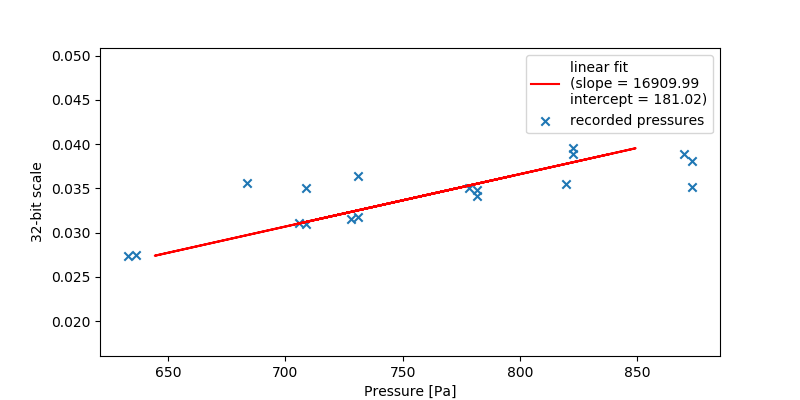

Text(0,0.5,'32-bit scale')

In [234]:
plt.figure(figsize=(8,4))
plt.scatter(pressure, amplitude, marker='x')
# plt.plot(pressure, amplitude)
plt.plot(yr, amplitude, c='r')
plt.legend(('linear fit \n(slope = %.2f \nintercept = %.2f)' %(ar,br), 'recorded pressures'))
plt.xlabel('Pressure [Pa]')
plt.ylabel('32-bit scale')

<IPython.core.display.Javascript object>


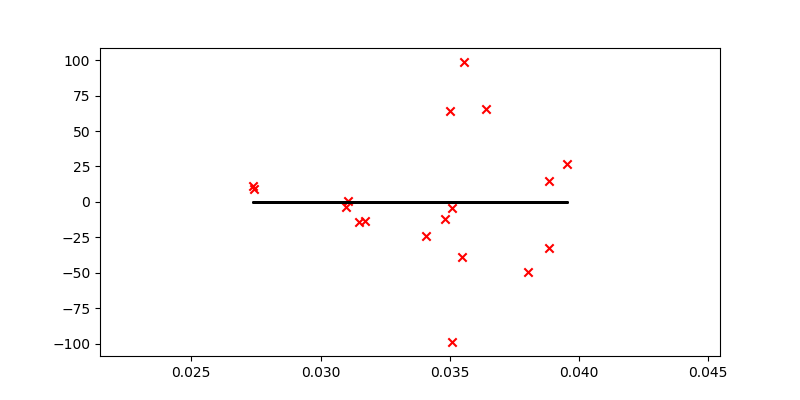

In [237]:
plt.figure('Residuals', figsize=(8,4))
plt.scatter(amplitude, yr-pressure, c='r', marker='x')
plt.plot(amplitude, np.zeros(len(amplitude)), 'k', linewidth='2')